<a href="https://colab.research.google.com/github/ABBAS-37405/PYTHON-AND-DATA-SCIENCE/blob/main/dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#pip install numpy


In [3]:
#pip install scikit-learn

In [4]:
#pip install openpyxl
#pip install pandas


In [5]:
import pandas as pd
import numpy as np
import os

# READING EXCEL FILE .XLSX

*   List item
*   List item



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

excel_export_url = '/content/drive/MyDrive/Datasets/customer_data.xlsx'
data = pd.read_excel(excel_export_url)

print("Data loaded successfully. Here's the head of the DataFrame:")
print(data.head())

Data loaded successfully. Here's the head of the DataFrame:
  CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1       

## FIND THE MISSING VALUE BY USING .ISLNULL().SUM()

In [8]:
missing_values=data.isnull().sum()
print("Missing Values")
missing_values

Missing Values


,0
CustomerID,0
Gender,0
Age,0
Income,5
City,3
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


# IMPUTER
IS USED TO FILL THE MISSING VALUES BY USING ANY STRATEGY LIKE MEAN MEDIAN MODE ETC

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
print(missing_values)

CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64


## REPLACE MISSING INCOME BY MEDIAN STRATEGY

In [11]:
imputer_1=SimpleImputer(strategy='median')
imputer_1.fit(data[['Income']])
data[['Income']]=imputer_1.transform(data[['Income']])

## REPLACE THE CATAGORICAL DATA CITY BY MOST FREQUENT VLAUES

In [12]:
imputer_2=SimpleImputer(strategy='most_frequent')
imputer_2.fit(data[['City']])
data[['City']]=imputer_2.transform(data[['City']])

CHECK AGAIN THE MISSING VALUES

In [13]:
missing_values=data.isnull().sum()
print("Missing Values")
missing_values

Missing Values


,0
CustomerID,0
Gender,0
Age,0
Income,0
City,0
Region,0
Frequency_of_Purchases,0
Average_Purchase_Amount,0
Customer_Lifespan_Months,0
Purchase_Channel,0


# Inconsistent Data Values HANDLING

In [14]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,object
Purchase_Channel,object


## FIRST CHECK THE UNIQUENESS OF DATA USING .UNIQUE() METHOD

In [15]:
unique_values=data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

### CHANGE DATA BY ELIMINATING 'XXXX'

In [16]:
data=data[data['Customer_Lifespan_Months']!='XXXX']

In [17]:
unique_values=data['Customer_Lifespan_Months'].unique()
unique_values

array([3, 4, 1, 2, 5], dtype=object)

In [18]:
data['Customer_Lifespan_Months']=data['Customer_Lifespan_Months'].astype(int)

In [19]:
data['Date_of_Purchase'] = pd.to_datetime(data['Date_of_Purchase'])

In [20]:
data.dtypes

,0
CustomerID,object
Gender,object
Age,int64
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object


## FIND THE DUPLICATION OF DATA I.E INCONSISTENT

In [21]:
duplicates=data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
80,C021,Female,22,41743.0,Los Angeles,Northeast,4,54.599,1,Online,2023-06-08,No


### DROPE THE DUPLICATE BY USING .DROP_DUPLICATES() METHOD WIWTH INPLACE = TRUE MEAN DROP FROM ORIGINOL FILE

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
duplicates=data.duplicated()
data[duplicates]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status


## SORT THE DATA INCOME BY DESCENDING ORDER I.E HIGHER TO LOWER

In [24]:
sorted_data_income=data.sort_values(by="Income",ascending=False)
sorted_data_income

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
55,C056,Female,29,107662.0,Houston,Northeast,3,47.877,1,In-store,2022-02-11,No
22,C023,Female,41,105186.0,Los Angeles,Midwest,14,137.697,4,Online,2023-07-15,Yes
70,C071,Female,36,103264.0,Los Angeles,Northeast,11,117.394,3,Online,2023-12-22,Yes
32,C033,Female,31,98590.0,Houston,West,7,76.114,2,Online,2023-06-30,No
52,C053,Female,45,90860.0,Houston,Northeast,10,105.287,3,In-store,2023-12-29,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14,C015,Male,44,32500.0,New York,Northeast,9,96.473,3,Online,2023-03-30,No
49,C050,Female,39,29104.0,Houston,Midwest,7,84.461,2,Online,2022-03-17,No
10,C011,Female,53,27958.0,Los Angeles,Midwest,10,98.449,3,In-store,2023-07-16,Yes
23,C024,Male,54,27660.0,New York,Midwest,12,125.763,3,Online,2023-07-11,Yes


### FILTERING OR SLICING 5 ROWS 6 COLS data.loc and data.iloc methods

In [25]:
data.loc[0:4,'CustomerID':'Region']

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


In [26]:
data.iloc[0:5,0:6]

,CustomerID,Gender,Age,Income,City,Region
0,C001,Male,49,72504.0,Chicago,Northeast
1,C002,Female,38,40881.0,New York,West
2,C003,Male,17,63333.0,New York,Northeast
3,C004,Male,34,58030.0,Chicago,Midwest
4,C005,Male,30,78889.0,Houston,Midwest


### CONDITIONAL FILTERING USING RELATIONAL AND LOGICAL OPERATORS

In [27]:
male_data=data[data['Gender']=='Male']
male_data.head(5)

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
5,C006,Male,52,76470.0,Chicago,Midwest,11,117.012,3,Online,2022-11-30,Yes


### FIND THE FREQUENCY OF PURCHASE OF MALES >=2 AND <=5

In [28]:
male_freq=male_data[(male_data['Frequency_of_Purchases']>=2) & (male_data['Frequency_of_Purchases']<=5)]
male_freq

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No
35,C036,Male,23,43471.0,New York,West,5,65.357,1,Online,2022-08-12,No


### customers life span greater than 2 months

In [29]:
data[(data['Customer_Lifespan_Months']>=5)]

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status
60,C061,Male,24,53080.0,Los Angeles,West,16,193.046,5,In-store,2022-07-28,Yes


## MERGING DATA FROM TWO FILES HORIZONTALLAY

In [30]:
file_path_2 = "/content/drive/MyDrive/Datasets/performance_data.xlsx"

#print("\n--- Alternative Syntax Check ---")
print(f"Path using forward slashes (also correct):\n {file_path_2}")

data2= pd.read_excel(file_path_2) # This would also work.
data2.head()

Path using forward slashes (also correct):
 /content/drive/MyDrive/Datasets/performance_data.xlsx


,CustomerID,Recency,Frequency_Score,Monetary_Score
0,C001,3,2,2
1,C002,3,3,3
2,C003,4,4,4
3,C004,2,2,2
4,C005,1,1,1


In [31]:
data2.shape

(80, 4)

In [32]:
joind_data=pd.merge(data,data2,on='CustomerID',how='inner')
joind_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23,No,1,1,1


In [33]:
joind_data.shape

(79, 15)

# ADDING DATA IN VERICALLAY
## BY USING CONCATINATION METHOD USE ALSO INDEX AND DROPE THE ADDITIONAL COL

In [34]:
file_path_3 = "/content/drive/MyDrive/Datasets/additional_data.xlsx"

#print("\n--- Alternative Syntax Check ---")
print(f"Path using forward slashes (also correct):\n {file_path_3}")

additional_data= pd.read_excel(file_path_3) # This would also work.
additional_data.head()

Path using forward slashes (also correct):
 /content/drive/MyDrive/Datasets/additional_data.xlsx


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,CustomerID.1,Recency,Frequency_Score,Monetary_Score
0,C081,Male,37,50728,Chicago,West,11,75.757,2,In-store,2023-09-10,Yes,C081,2,2,1
1,C082,Female,48,69629,Los Angeles,Midwest,9,78.433,4,In-store,2023-07-15,No,C082,3,4,4
2,C083,Male,28,29184,Chicago,Northeast,7,82.794,3,Online,2023-08-25,Yes,C083,3,1,2
3,C084,Female,33,61265,Los Angeles,West,15,88.490,2,Online,2022-10-22,Yes,C084,4,1,3
4,C085,Female,30,63130,Houston,Midwest,13,108.749,3,Online,2023-04-01,Yes,C085,4,4,1


In [35]:
final_data=(pd.concat([joind_data,additional_data])).reset_index(drop=True)
print(final_data.shape)
final_data.tail()

(99, 16)


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,CustomerID.1
94,C096,Male,32,18600.0,Chicago,Northeast,12,123.003,4,Online,2022-02-03,Yes,4,2,3,C096
95,C097,Male,38,68525.0,Chicago,West,13,106.526,4,Online,2023-09-20,Yes,4,3,3,C097
96,C098,Female,24,73538.0,Houston,West,3,162.533,1,In-store,2023-11-04,Yes,2,1,1,C098
97,C099,Female,20,47251.0,Chicago,Midwest,5,145.404,2,In-store,2022-09-24,No,4,3,1,C099
98,C100,Male,39,52054.0,Chicago,Midwest,14,36.975,2,In-store,2023-05-03,No,1,4,4,C100


## DROPE THE CUSTOMERID.1 THAT IS DUPLICATE

In [36]:
final_data=final_data.drop(labels='CustomerID.1',axis=1)
print(final_data.shape)
final_data.head()

(99, 15)


,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1


## VALUES_COUNTS() METHOD
IS USED TO CALCULATE THE FREQUENCY
LET WE
### FIND THE PUCHASE_CHANNEL FREQENCY

In [37]:
purchase_channel_freq=final_data["Purchase_Channel"].value_counts()
purchase_channel_freq

,count
Purchase_Channel,
Online,65
In-store,34


### CALCULATE THE PERCENTAGE

In [38]:
total_of_pur_channel=len(final_data['Purchase_Channel'])
percen_purchase_channel_freq=purchase_channel_freq/total_of_pur_channel*100
percen_purchase_channel_freq

,count
Purchase_Channel,
Online,65.656566
In-store,34.343434


# DESCRIPTIVE STATISTICS
## LIKE MEAN MEDIAN SD ETC
USE DTHE DESCRIBE() METHOD TO FIND ALL DESC. STAT. SUMMARY ON NUMERIC VALUES
ROUND IT FOR ONE DECIMAL PLACES
ANALYSE THE RESULT IF NEED TO REMOVE THE INCONSISTENCY DATA

In [115]:
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
count,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
mean,35.0,58131.0,9.0,98.0,3.0,3.0,3.0,3.0,6.0,11.0
std,10.0,18713.0,3.0,29.0,1.0,1.0,1.0,1.0,1.0,2.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0,4.0,7.0
25%,28.0,45482.0,7.0,76.0,2.0,2.0,2.0,2.0,5.0,9.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0,6.0,11.0
75%,42.0,71994.0,12.0,120.0,3.0,4.0,4.0,4.0,6.0,12.0
max,54.0,107662.0,16.0,193.0,5.0,4.0,4.0,4.0,7.0,14.0


In [116]:
final_data=final_data[final_data['Average_Purchase_Amount']!=final_data['Average_Purchase_Amount'].max()]
round(final_data.describe())

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
count,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0
mean,35.0,58183.0,9.0,97.0,3.0,3.0,3.0,3.0,6.0,11.0
std,10.0,18803.0,3.0,27.0,1.0,1.0,1.0,1.0,1.0,2.0
min,17.0,15531.0,1.0,37.0,0.0,1.0,1.0,1.0,4.0,7.0
25%,28.0,45239.0,7.0,76.0,2.0,2.0,2.0,2.0,5.0,9.0
50%,35.0,58033.0,10.0,97.0,3.0,3.0,3.0,3.0,6.0,11.0
75%,42.0,72504.0,12.0,119.0,3.0,4.0,4.0,4.0,6.0,12.0
max,54.0,107662.0,15.0,163.0,4.0,4.0,4.0,4.0,7.0,14.0


In [117]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,13.246574
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,11.313834
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,6.683210
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,10.548012
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,9.739345


## GROUP BY ANALYSIS
USED BY GROUPBY() METHOD
IF YOU WANT TO FIND THE PERFORMANCE OF EACH CITY STORE BASED ON THE AVG PURCHASE AMOUND
(median(),min(),max(),sum())

In [118]:
city_purchase_amount=final_data.groupby('City')['Average_Purchase_Amount'].median()
city_purchase_amount

,Average_Purchase_Amount
City,
Chicago,102.1860
Houston,87.6615
Los Angeles,98.4490
New York,94.4690


## PIVOT TABLE:
THE DIFF. B/W GROUP BY AND PIVOT IS THAT WE CAN GET SUMMARIZED VALUES FOR MULTIPLE VALUES LIKE MEAN MEDIAN FREQ OR %AGE FOR SINGLE CATAGORICAL COL. IN GROUP BY WE GET ONE SUMMARY

In [119]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,13.246574
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,11.313834
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,6.683210
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,10.548012
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,9.739345


## FIND CHURN_STATES FOR RECENCY FREQ AND MONETORY FOR CHURNED AND NOT CHURNED

In [120]:
pivot_table=final_data.pivot_table(index='Churn_Status',values=['Recency','Frequency_Score','Monetary_Score'],
                                   aggfunc={'Recency':'mean','Frequency_Score':'mean','Monetary_Score':'mean',
                                            'Churn_Status':'count'})

In [121]:
pivot_table

,Churn_Status,Frequency_Score,Monetary_Score,Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,54,2.537037,2.537037,2.648148


## RENAME THE COLUMNS

In [122]:
pivot_table=pivot_table.rename( columns=
                               { 'Recency':'mean_Recency','Frequency_Score':'mean_FS','Monetary_Score':'mean_MS',
                                            'Churn_Status':'Freq_Churn'})

In [123]:
pivot_table

,Freq_Churn,mean_FS,mean_MS,mean_Recency
Churn_Status,,,,
No,43,2.744186,2.558140,2.720930
Yes,54,2.537037,2.537037,2.648148


## CROSS TABULIZATION : YOU CAN CREATE CROSS TAB BETWEEN TWO CATAGORIACAL VARIABLES

In [124]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,13.246574
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,11.313834
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,6.683210
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,10.548012
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,9.739345


In [125]:
cross_tab=pd.crosstab(final_data['City'],final_data['Churn_Status'])
cross_tab

Churn_Status,No,Yes
City,,
Chicago,8,17
Houston,16,16
Los Angeles,10,13
New York,9,8


## VISUALIZATION

### BAR CHART ON purchase_channel_freq USING MATPLOTLIB.PYPLOT

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

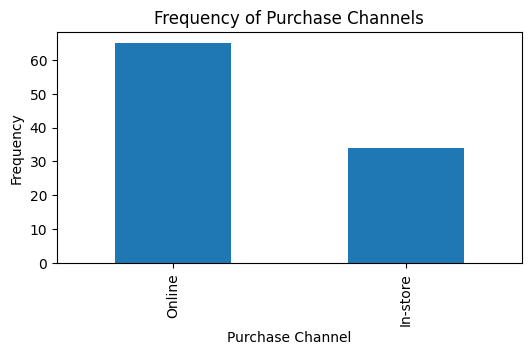

In [127]:
plt.figure(figsize=(6,3))
purchase_channel_freq.plot(kind='bar')
plt.xlabel('Purchase Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase Channels')
plt.show()

## using SEABORN no need to perform purchase freq first etc

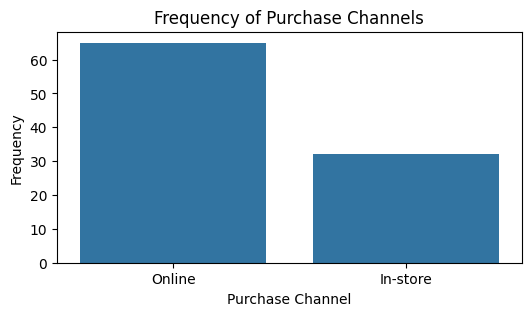

In [128]:
plt.figure(figsize=(6,3))
sns.countplot(x='Purchase_Channel',data=final_data)
plt.xlabel('Purchase Channel')
plt.ylabel('Frequency')
plt.title('Frequency of Purchase Channels')
plt.show()

### STACKET CHART FOR CROSS TABULIZATION

<Figure size 600x300 with 0 Axes>

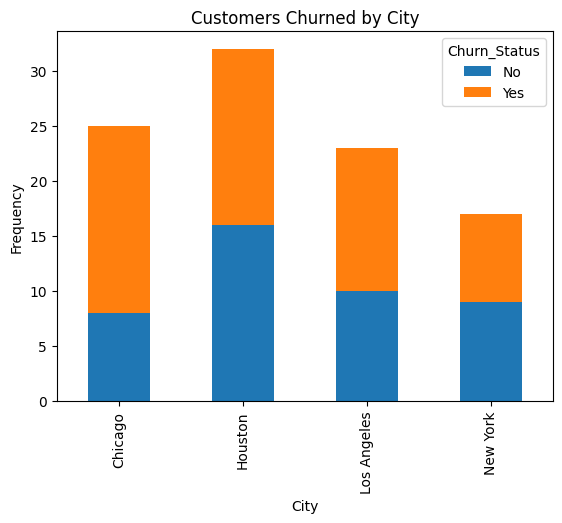

In [129]:
plt.figure(figsize=(6,3))
cross_tab.plot(kind='bar',stacked=True)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Customers Churned by City')
plt.show()

### using SEABORN NO NEED TO PERFORM CROSS TAB INITIALLY

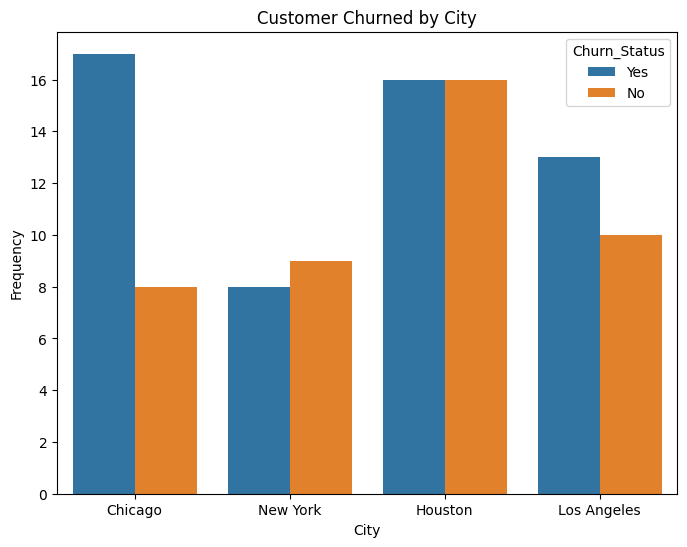

In [130]:
plt.figure(figsize=(8,6))
sns.countplot(x='City', hue='Churn_Status', data=final_data)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Customer Churned by City')
plt.show()

## PIE CHART
PIE CHART FEATURE IS ONLY AVAILABLE IN MATPLOTLIB AND IT WILL BE PERFORMED ON VARIABLE STORED THE PERCENTAGE

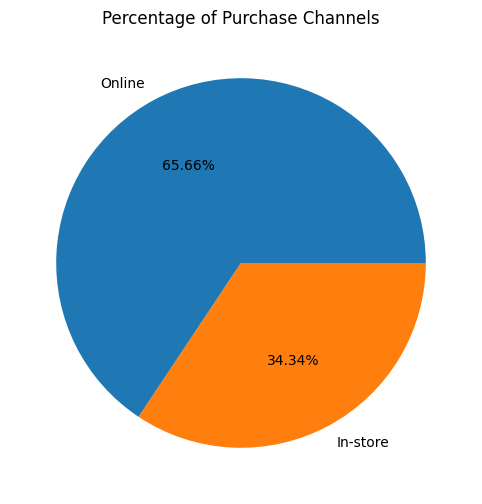

In [131]:
plt.figure(figsize=(8,6))
percen_purchase_channel_freq.plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of Purchase Channels')
plt.ylabel('')
plt.show()


## LINECHART
LINE CHART IS PERFORMED ON GROUPBY ANALYSIS IN MATPLOTLIB AND IN SEABON DIRECTLY USING CAT_COL AND VALUE_COL

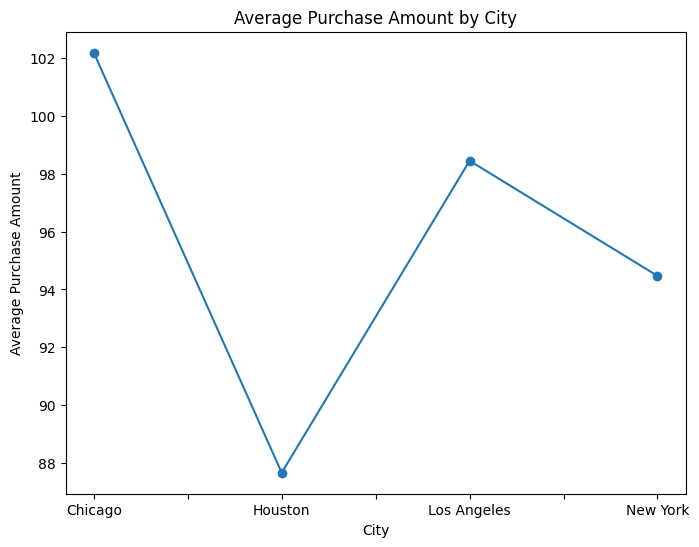

In [132]:
plt.figure(figsize=(8,6))
city_purchase_amount.plot(kind='line',marker='o')
plt.xlabel("City")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by City")
plt.show()

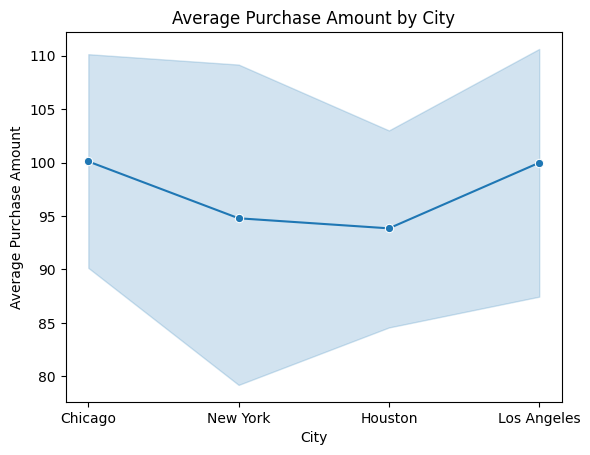

In [133]:
sns.lineplot(x='City',y='Average_Purchase_Amount',data=final_data,marker='o')
plt.xlabel("City")
plt.ylabel("Average Purchase Amount")
plt.title("Average Purchase Amount by City")
plt.show()

## HISTOGRAM:

Text(0.5, 1.0, 'Distribution of Average Purchase Amount')

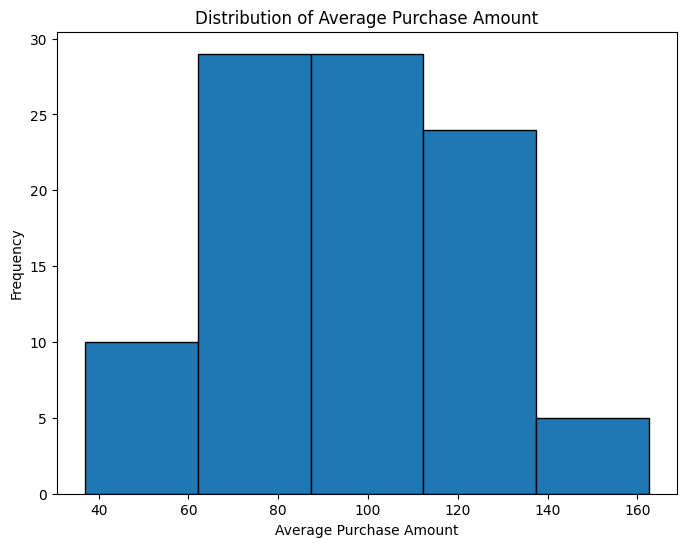

In [134]:
plt.figure(figsize=(8,6))
final_data['Average_Purchase_Amount'].plot(kind='hist',bins=5,edgecolor='black')
plt.xlabel("Average Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Average Purchase Amount")

Text(0.5, 1.0, 'Distribution of Average Purchase Amount')

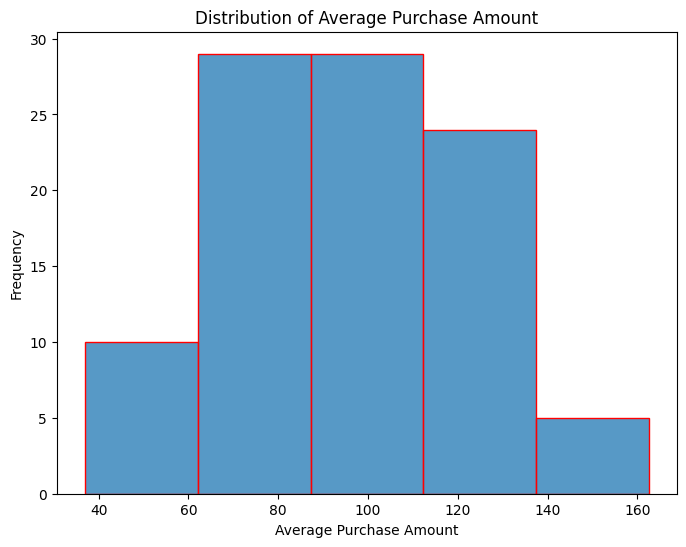

In [135]:
plt.figure(figsize=(8,6))
sns.histplot(final_data['Average_Purchase_Amount'],bins=5,edgecolor='red')
plt.xlabel("Average Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Average Purchase Amount")

### SCATTER PLOT
IT SHOWS THE REL BETWEEN TWO NUMERIC DATA
ITS BETTER LOOK IS USING SEABORN BECAUSE AUTO TREND LINE WILL APPEAR

Text(0.5, 1.0, 'Frequency of Purchase vs. Average Purchase Amount')

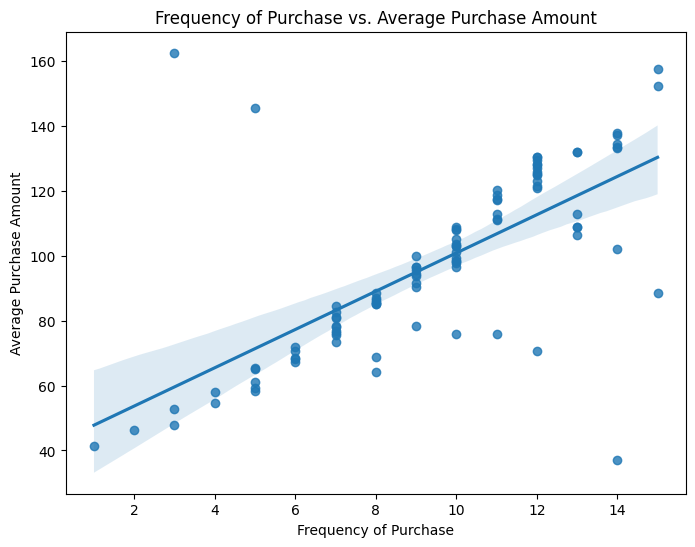

In [136]:
plt.figure(figsize=(8,6))
sns.regplot(x='Frequency_of_Purchases', y='Average_Purchase_Amount', data=final_data)
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.title('Frequency of Purchase vs. Average Purchase Amount')

Text(0.5, 1.0, 'Frequency of Purchase vs. Average Purchase Amount')

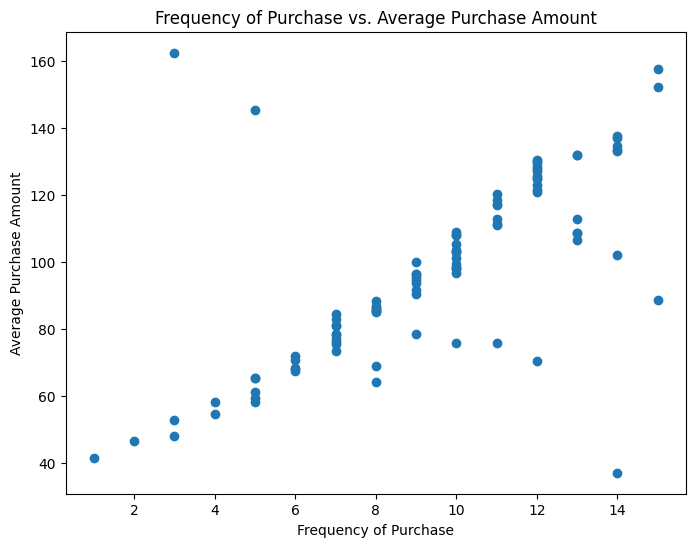

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.title('Frequency of Purchase vs. Average Purchase Amount')

## HEATMAP AND CORRELATION MATRIX
CORRELATION BETWEEN ALL NUMERIC VALUES CAN BE CREATED

In [138]:
numeric_final_data = final_data.select_dtypes(include=np.number)
correl = round(numeric_final_data.corr(), 3)
correl

,Age,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
Age,1.000,0.108,0.334,0.223,0.376,-0.066,-0.024,0.050,0.997,0.997
Income,0.108,1.000,-0.017,0.035,0.077,0.176,0.161,0.160,0.119,0.118
Frequency_of_Purchases,0.334,-0.017,1.000,0.689,0.749,-0.034,-0.035,-0.038,0.342,0.342
Average_Purchase_Amount,0.223,0.035,0.689,1.000,0.665,0.023,-0.102,-0.154,0.218,0.218
Customer_Lifespan_Months,0.376,0.077,0.749,0.665,1.000,-0.037,0.024,0.035,0.377,0.377
Recency,-0.066,0.176,-0.034,0.023,-0.037,1.000,0.755,0.738,-0.071,-0.071
Frequency_Score,-0.024,0.161,-0.035,-0.102,0.024,0.755,1.000,0.815,-0.028,-0.028
Monetary_Score,0.050,0.160,-0.038,-0.154,0.035,0.738,0.815,1.000,0.051,0.051
Age_sqrt,0.997,0.119,0.342,0.218,0.377,-0.071,-0.028,0.051,1.000,1.000
Age_boxcox,0.997,0.118,0.342,0.218,0.377,-0.071,-0.028,0.051,1.000,1.000


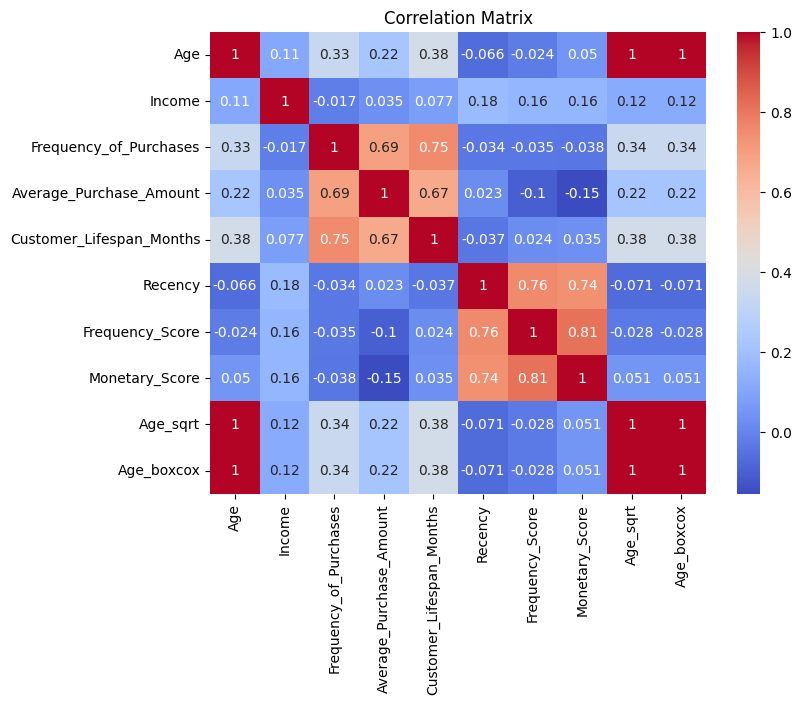

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(correl,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## KDE PLOT
A KDE plot, or Kernel Density Estimate plot, is a method for visualizing the probability density function of a continuous variable. It's often used to see the distribution of data, much like a histogram, but with a smoothed curve rather than distinct bars. It provides a non-parametric estimation of the probability density of a random variable

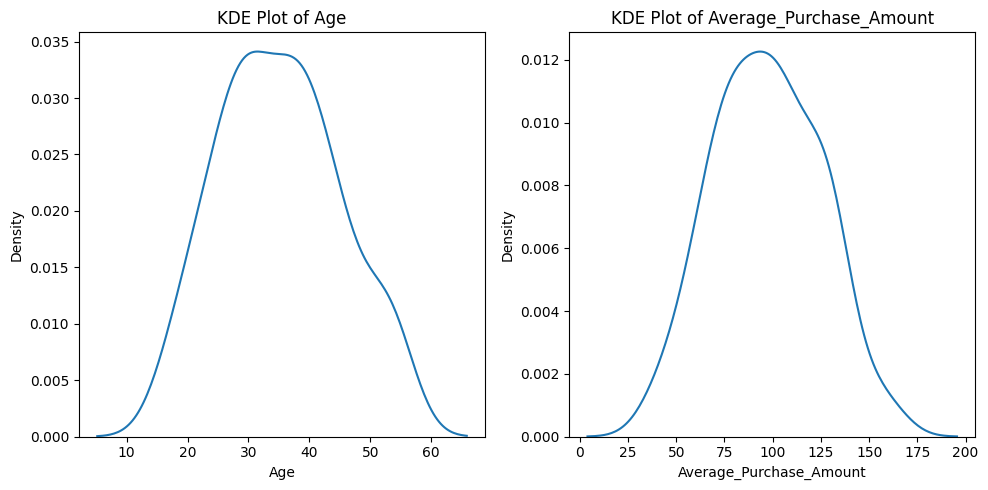

In [140]:
numeric_cols=['Age','Average_Purchase_Amount']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for index,col in enumerate(numeric_cols):
  sns.kdeplot(final_data[col],ax=axes[index])
  axes[index].set_title(f'KDE Plot of {col}')
plt.tight_layout()
plt.show()

the following is testing histogram

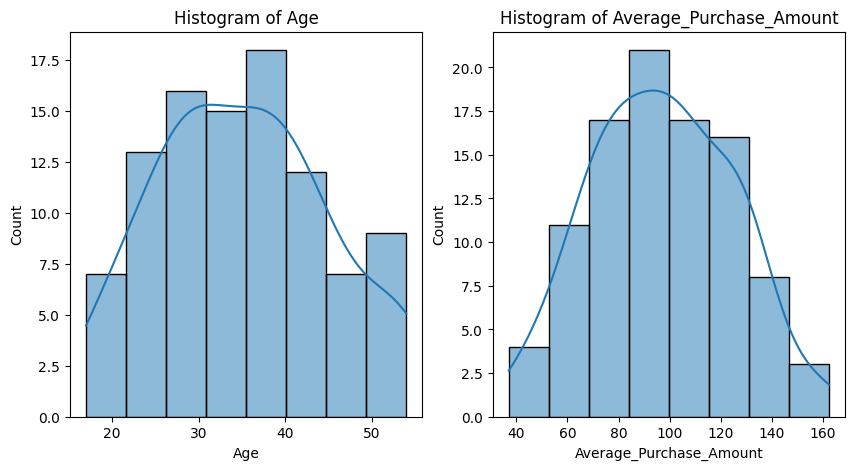

In [141]:
numeric_columns=['Age','Average_Purchase_Amount']
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for index,col in enumerate(numeric_columns):
  sns.histplot(final_data[col],ax=axes[index],kde=True)
  axes[index].set_title(f'Histogram of {col}')

## SHAPIRO-WILK TEST
The Shapiro-Wilk test is a statistical test used to check if a sample of data comes from a normally distributed population. It's often used in statistics to assess the normality of data, which is an assumption for many parametric statistical tests. IF VALUE IS > 0.05 THEN NUMERIC VARIABLE FOLLOW THE NORMAL DISTRIBUTION OTHERWISE TRANSFORMATION WILL APPLY

In [142]:
from scipy.stats import shapiro
shapiro_results={}
for col in numeric_cols:
  stat,p_value=shapiro(final_data[col])
  shapiro_results[col]=round(p_value,3)
shapiro_results

{'Age': np.float64(0.045), 'Average_Purchase_Amount': np.float64(0.691)}

age value is less than 0.05 so some transformation is to apply on age

# TRANSFORMATIONS

## SQRT TRANSFORMATION METHOD
A square root (sqrt) transformation is a data transformation technique where each data point is replaced by its square root. It is commonly used to:

Reduce skewness: It can help make skewed distributions (especially right-skewed ones) more symmetric and closer to a normal distribution. This is often useful for variables like counts or small positive values.
Stabilize variance: It can help in cases where the variance of a variable is related to its mean, making the spread of data more consistent across different values.
Improve linearity: For some relationships between variables, a square root transformation can help linearize the relationship, which can be beneficial for linear models.

In [67]:
def sqrt_transformation(data, col_name):
  data[f'{col_name}_sqrt']=np.sqrt(data[col_name])
  stat,p_value=shapiro(data[f'{col_name}_sqrt'])
  kdeplot=sns.kdeplot(data[f'{col_name}_sqrt'])
  print(kdeplot)
  print('p_value = ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value =  0.09854088997154391


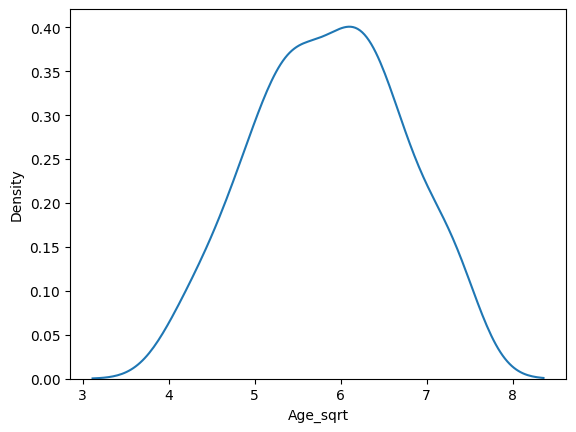

In [68]:
sqrt_transformation(final_data,'Age')

it success fully convert to normall distribution as p_valur is 0.098 which is greater than 0.05

In [69]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


## LOG_TRANSFORMATION

In [70]:
def log_transformation(data, col_name):
  data[f'{col_name}_log']=np.log(data[col_name])
  stat,p_value=shapiro(data[f'{col_name}_log'])
  kdeplot=sns.kdeplot(data[f'{col_name}_log'])
  print(kdeplot)
  print('p_value = ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value =  0.03301636122262527


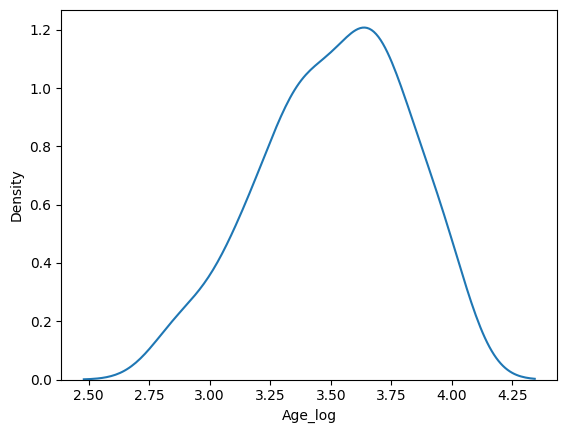

In [71]:
log_transformation(final_data,'Age')

as it fail to convert so drop the col 'Age_log'

In [72]:
final_data=final_data.drop(labels='Age_log',axis=1)
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


## BOXCOX TRANSFORMATION

In [73]:
  from scipy.stats import boxcox
  def boxcox_transformation(data, col_name):
    data[f'{col_name}_boxcox'], _ = boxcox(data[col_name])
    stat,p_value=shapiro(data[f'{col_name}_boxcox'])
    kdeplot=sns.kdeplot(data[f'{col_name}_boxcox'])
    print(kdeplot)
    print('p_value = ',p_value)

Axes(0.125,0.11;0.775x0.77)
p_value =  0.09806346287562484


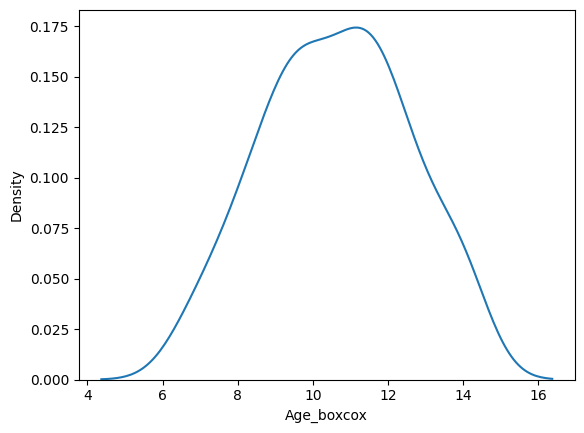

In [74]:
boxcox_transformation(final_data,'Age')

In [75]:
final_data.head()

,CustomerID,Gender,Age,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,Age_boxcox
0,C001,Male,49,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,13.246574
1,C002,Female,38,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,11.313834
2,C003,Male,17,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,6.683210
3,C004,Male,34,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,10.548012
4,C005,Male,30,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,9.739345


## T-TEST
PERFORM THE T TEST BETWEEN THE CHURNED CUSTOMERS AND EXISTING CUTOMERS ON AVERAGE PURCHASE AMOUNT AND CHECK THE DIFFERENCE IS SIGNIFICANT I.E GREATER THAN 5% OR NOT

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's particularly useful when you have a relatively small sample size or when the population standard deviation is unknown.

Why is it used?

The t-test helps you answer questions like:

Comparing two independent groups: For example, is there a significant difference in the average purchase amount between male and female customers?
Comparing a sample mean to a known population mean: For example, is the average income of your customer segment significantly different from the national average income?
Comparing paired observations: For example, did a marketing campaign significantly increase the average purchase amount for the same group of customers before and after the campaign?
In essence, it helps you determine if the observed difference between two groups' averages is likely due to chance or if it represents a true, statistically significant difference.



In [76]:
preprocessed_data = final_data.drop(['Age', 'Age_boxcox'], axis = 1)
preprocessed_data.head()


,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [77]:
from scipy import stats
churned_customers=preprocessed_data.query('Churn_Status=="Yes"')['Average_Purchase_Amount']
existing_customers=preprocessed_data.query('Churn_Status=="No"')['Average_Purchase_Amount']
t_statistic,p_value=stats.ttest_ind(churned_customers,existing_customers)
print('t_statistic = ',t_statistic)
print('p_value = ',p_value)

t_statistic =  8.667692494411922
p_value =  1.077550720319448e-13


In [78]:
alpha = 0.05

if p_value < alpha:
    print(f"Since the p-value ({p_value:.2e}) is less than the significance level ({alpha}), we reject the null hypothesis.\nThis means there is a statistically significant difference in Average Purchase Amount between churned and existing customers.")
else:
    print(f"Since the p-value ({p_value:.2e}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.\nThis means there is no statistically significant difference in Average Purchase Amount between churned and existing customers.")

Since the p-value (1.08e-13) is less than the significance level (0.05), we reject the null hypothesis.
This means there is a statistically significant difference in Average Purchase Amount between churned and existing customers.


## VARIANCE ANALYSIS
ANOVA stands for Analysis of Variance. It's a statistical test used to determine if there are any statistically significant differences between the means of two or more independent groups. Essentially, it helps you understand if the variation you observe in your data is due to differences between the groups you're studying or simply due to random chance.

Here's a breakdown of what it does and why it's used:

Comparing Means: ANOVA is an extension of the t-test. While a t-test compares the means of two groups, ANOVA allows you to compare the means of three or more groups simultaneously.
Sources of Variance: The core idea behind ANOVA is to split the total variance in a dataset into different sources. It looks at:
Between-group variance: How much the means of different groups vary from each other.
Within-group variance: How much individual data points vary within each group.
F-statistic: ANOVA calculates an F-statistic, which is the ratio of between-group variance to within-group variance. A larger F-statistic suggests that the differences between group means are more significant than the variability within the groups.
P-value: Along with the F-statistic, ANOVA provides a p-value. If the p-value is less than a predetermined significance level (commonly 0.05), you reject the null hypothesis. The null hypothesis in ANOVA states that there is no significant difference between the means of the groups.
When is it used?

ANOVA is widely used in various fields, including:

Experimentation: To compare the effectiveness of different treatments or interventions (e.g., comparing the average test scores of students taught with three different methods).
Business Analysis: To compare sales performance across different regions, marketing campaigns, or product lines.
Social Sciences: To analyze differences in opinions or behaviors among various demographic groups.
Types of ANOVA:

One-Way ANOVA: Used when you have one categorical independent variable (with three or more levels/groups) and one continuous dependent variable.
Two-Way ANOVA: Used when you have two categorical independent variables and one continuous dependent variable.
MANOVA (Multivariate Analysis of Variance): Used when you have one or more categorical independent variables and two or more continuous dependent variables.
In summary, ANOVA is a powerful tool for analyzing differences between group means, helping researchers and analysts make informed conclusions about the impact of different factors on a continuous outcome.

FIRST CHECK FOR NORMAL DIST. IS FOLLOWING

In [79]:
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226


In [80]:
preprocessed_data['City'].value_counts()

,count
City,
Houston,32
Chicago,25
Los Angeles,24
New York,17


In [81]:
stat,p_value=shapiro(preprocessed_data['Frequency_of_Purchases'])
print('p_value = ',p_value)


p_value =  0.11246168308148519


In [82]:
chicago_cust=preprocessed_data.query('City=="Chicago"')['Frequency_of_Purchases']
new_york_cust=preprocessed_data.query('City=="New York"')['Frequency_of_Purchases']
hoston_cust=preprocessed_data.query('City=="Houston"')['Frequency_of_Purchases']
losangeles_cust=preprocessed_data.query('City=="Los Angeles"')['Frequency_of_Purchases']
t_statistic,p_value=stats.f_oneway(chicago_cust,new_york_cust,hoston_cust,losangeles_cust)
print('t_statistic = ',t_statistic)
print('p_value = ',p_value)

t_statistic =  2.195110403160077
p_value =  0.0937561908706892


In [83]:
alpha = 0.05

if p_value < alpha:
    print(f"Since the p-value ({p_value:.2e}) is less than the significance level ({alpha}), we reject the null hypothesis.\nThis means there is a statistically significant difference in Average Purchase Amount between churned and existing customers.")
else:
    print(f"Since the p-value ({p_value:.2e}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.\nThis means there is no statistically significant difference in Average Purchase Amount between churned and existing customers.")

Since the p-value (9.38e-02) is greater than the significance level (0.05), we fail to reject the null hypothesis.
This means there is no statistically significant difference in Average Purchase Amount between churned and existing customers.


### levene for result validation

In [84]:
from scipy.stats import levene
stat,p_value=levene(chicago_cust,new_york_cust,hoston_cust,losangeles_cust)
print('p_value = ',p_value)

p_value =  0.500791837582151


## chi squrae test
The Chi-square test assesses the independence between categorical variables. It compares observed frequencies in categories to expected frequencies. A significant p-value suggests a relationship between variables. It's used to determine if differences between groups are due to chance or a true association. This test is suitable for nominal or ordinal data.

we want to see whether there is any association b/w customers from different regions and purchasing a product from a specific purchase channel

In [85]:
from scipy.stats import chi2_contingency
cross_tab=pd.crosstab(preprocessed_data['Region'],preprocessed_data['Purchase_Channel'])
print(cross_tab)
chi2,p_value,dof,expected=chi2_contingency(cross_tab)
print('p_value = ',p_value)
if p_value < 0.05:
    print("There is a significant association between Region and Purchase Channel.")
else:
    print("There is no significant association between Region and Purchase Channel.")

Purchase_Channel  In-store  Online
Region                            
Midwest                 10      26
Northeast               10      18
West                    13      21
p_value =  0.628361041713461
There is no significant association between Region and Purchase Channel.


## PEARSON CORRELATION
Pearson Correlation measures the linear relationship between two continuous variables. Its value ranges from -1 to +1, where +1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. It's often used to identify strength and direction of association.

TWO STEPS ARE NECESSARY FOR PEARSON CORRELATION 1. IF NORMAL DISTRIPUTION IS FOLLOWED BY BOTH THE NUMERIC VARIABLES
2. LINARITY B/W BOTH NUMERIC VARIABLES

In [86]:
from scipy.stats import shapiro

# Shapiro-Wilk test for 'Frequency_of_Purchases'
stat_freq, p_value_freq = shapiro(preprocessed_data['Frequency_of_Purchases'])
print(f"Shapiro-Wilk test for 'Frequency_of_Purchases':\n  Statistic = {stat_freq:.3f}, p-value = {p_value_freq:.3f}")
if p_value_freq > 0.05:
    print("  'Frequency_of_Purchases' appears to be normally distributed (fail to reject H0)\n")
else:
    print("  'Frequency_of_Purchases' does not appear to be normally distributed (reject H0)\n")

# Shapiro-Wilk test for 'Average_Purchase_Amount'
stat_avg_pur, p_value_avg_pur = shapiro(preprocessed_data['Average_Purchase_Amount'])
print(f"Shapiro-Wilk test for 'Average_Purchase_Amount':\n  Statistic = {stat_avg_pur:.3f}, p-value = {p_value_avg_pur:.3f}")
if p_value_avg_pur > 0.05:
    print("  'Average_Purchase_Amount' appears to be normally distributed (fail to reject H0)\n")
else:
    print("  'Average_Purchase_Amount' does not appear to be normally distributed (reject H0)\n")

Shapiro-Wilk test for 'Frequency_of_Purchases':
  Statistic = 0.979, p-value = 0.112
  'Frequency_of_Purchases' appears to be normally distributed (fail to reject H0)

Shapiro-Wilk test for 'Average_Purchase_Amount':
  Statistic = 0.988, p-value = 0.487
  'Average_Purchase_Amount' appears to be normally distributed (fail to reject H0)



NOW FIND THE LINEARITY BETWEEN BOTH VARIABLES

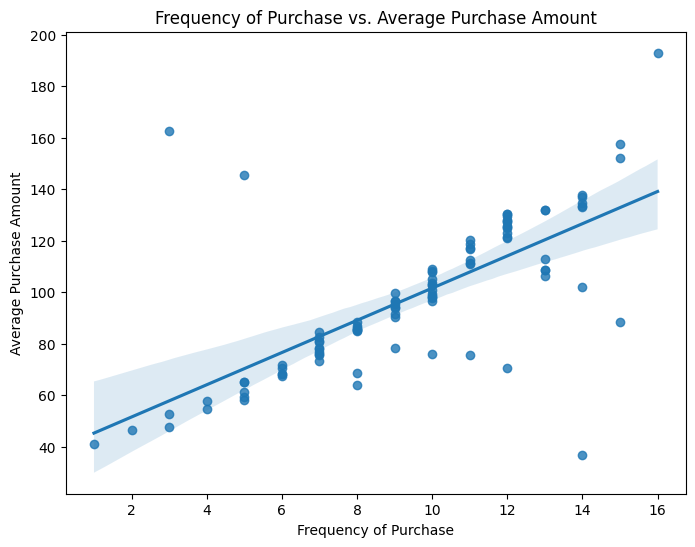

In [87]:
plt.figure(figsize=(8,6))
sns.regplot(x='Frequency_of_Purchases', y='Average_Purchase_Amount', data=preprocessed_data)
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.title('Frequency of Purchase vs. Average Purchase Amount')
plt.show()

now both condition varified so we will perform the pearson correlation test

In [88]:
from scipy.stats import pearsonr
purchase_freq=preprocessed_data['Frequency_of_Purchases']
purchase_amount=preprocessed_data['Average_Purchase_Amount']
correlation,p_value=pearsonr(purchase_freq,purchase_amount)
print('correlation = ',correlation)
print('p_value = ',p_value)
if p_value < 0.05:
    print("There is a significant correlation between Frequency_of_Purchases and Average_Purchase_Amount.")
else:
    print("There is no significant correlation between Frequency_of_Purchases and Average_Purchase_Amount.")
#

correlation =  0.7039911501130027
p_value =  6.176786543554977e-16
There is a significant correlation between Frequency_of_Purchases and Average_Purchase_Amount.


## LINEAR REGRESSION
Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It aims to find the best-fitting straight line that minimizes the sum of squared differences between observed and predicted values, allowing for prediction and understanding of variable influence.

### IMPORTAN ASSUMPTIONS
Assumptions of Linear Regression

Linear regression works correctly only if certain assumptions are (approximately) true.

Main Assumptions (Simply Explained):

Linearity

Relationship between X and Y should be linear

Example: marks increase roughly in a straight line with study hours

Independence of errors

One data point should not influence another

Common issue in time-series data

Homoscedasticity

Errors should have constant variance

Spread of residuals should be similar at all X values

Normality of errors

Residuals should be approximately normally distributed

Important for hypothesis testing

No multicollinearity (for multiple regression)

Independent variables should not be highly correlated with each other

🔹 Why important?
If assumptions are violated, predictions and statistical tests become unreliable.

### INFLUENCE OF FOP ON APA
AS THE LINEARITY AND NORMALITY ALREADY CHECKED

In [89]:
import statsmodels.api as sm
x=preprocessed_data['Frequency_of_Purchases']
y=preprocessed_data['Average_Purchase_Amount']
x=sm.add_constant(x)
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())
# note the following R-squared value , coef of const and frequency of purchases p_value

                               OLS Regression Results                              
Dep. Variable:     Average_Purchase_Amount   R-squared:                       0.496
Model:                                 OLS   Adj. R-squared:                  0.490
Method:                      Least Squares   F-statistic:                     94.33
Date:                     Thu, 18 Dec 2025   Prob (F-statistic):           6.18e-16
Time:                             03:32:12   Log-Likelihood:                -435.04
No. Observations:                       98   AIC:                             874.1
Df Residuals:                           96   BIC:                             879.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### REGRESSION EQUATION

In [90]:
freq=112
predicted_APA= 39.0765+(6.2551*freq)
print(predicted_APA)

739.6477


### add_constan method
The add_constant method adds a column of ones to your independent variable(s) matrix. This column represents the intercept term in a linear regression model, allowing the model to fit a line that does not necessarily pass through the origin.


also about OLS() in two lines
### OLS (Ordinary Least Squares)
is a common method for estimating the parameters of a linear regression model. It works by minimizing the sum of the squared differences between the observed values and the values predicted by the linear model.


 summary() and r-square , const and freq of puchases and p_value in summary()
Let's break down the linear regression summary() output:

### summary(): R-sq,const,freq of purch,p_value
This is a comprehensive report from statsmodels that provides a detailed overview of your regression analysis, including various statistical tests and metrics.

R-squared: 0.496: This value indicates that approximately 49.6% of the variation in the Average_Purchase_Amount can be explained by the Frequency_of_Purchases. A higher R-squared suggests a better fit of the model to the data.

const (coefficient): 39.0765: This is the intercept of the regression line. It suggests that when the Frequency_of_Purchases is zero, the predicted Average_Purchase_Amount is approximately 39.0765. Its p-value is 0.000, which is less than 0.05, indicating that the intercept is statistically significant.

Frequency_of_Purchases (coefficient): 6.2551: This is the slope of the regression line. It means that for every one-unit increase in Frequency_of_Purchases, the Average_Purchase_Amount is predicted to increase by approximately 6.2551 units. Its p-value is also 0.000, which is less than 0.05, indicating that Frequency_of_Purchases is a statistically significant predictor of Average_Purchase_Amount.

p_value (for coefficients): For both const and Frequency_of_Purchases, the p-value is 0.000. Since these p-values are less than the common significance level of 0.05, we can conclude that both the intercept and the coefficient for Frequency_of_Purchases are statistically significant, meaning they are unlikely to have occurred by random chance.

## FEATURE ENGINEERING
Feature engineering is the process of creating new features or transforming existing ones from raw data to improve the performance of machine learning models. It involves using domain knowledge to select, combine, and modify variables to extract more meaningful information and represent the underlying problem more effectively to the model.

CREATING TOTAL PURCHASE AMOUNT VARIABLE for customers value

In [91]:
preprocessed_data['customers_value']=preprocessed_data['Frequency_of_Purchases']*preprocessed_data['Average_Purchase_Amount']
#preprocessed_data.drop('Tot_Purch_Amount',axis=1,inplace=True)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289


CREATING CLV I.E CUSTOMERS LIFE VALUE

In [92]:
preprocessed_data['CLV']=preprocessed_data['customers_value']*preprocessed_data['Customer_Lifespan_Months']
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Date_of_Purchase,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,CLV
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,2022-03-05 00:00:00,Yes,3,2,2,7.000000,982.410,2947.230
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,2023-07-08 00:00:00,Yes,3,3,3,6.164414,2364.600,9458.400
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,2023-01-30 00:00:00,No,4,4,4,4.123106,41.252,41.252
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,2023-06-01 00:00:00,No,2,2,2,5.830952,403.974,403.974
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,2022-09-23 00:00:00,No,1,1,1,5.477226,158.289,158.289


EXTRACTING THE YEAR , MONTHS , DAYS IN SEPARATE VARIABLES FOR BETTER PROCESSING

In [93]:
preprocessed_data.dtypes


,0
CustomerID,object
Gender,object
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object
Date_of_Purchase,object


In [94]:
preprocessed_data['Date_of_Purchase']=pd.to_datetime(preprocessed_data['Date_of_Purchase'])
preprocessed_data.dtypes

,0
CustomerID,object
Gender,object
Income,float64
City,object
Region,object
Frequency_of_Purchases,int64
Average_Purchase_Amount,float64
Customer_Lifespan_Months,int64
Purchase_Channel,object
Date_of_Purchase,datetime64[ns]


In [95]:
preprocessed_data['year']=preprocessed_data['Date_of_Purchase'].dt.year
preprocessed_data['month']=preprocessed_data['Date_of_Purchase'].dt.month
preprocessed_data['day']=preprocessed_data['Date_of_Purchase'].dt.day
preprocessed_data.drop('Date_of_Purchase',axis=1,inplace=True)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,CLV,year,month,day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,Yes,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,Yes,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,No,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,No,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,No,1,1,1,5.477226,158.289,158.289,2022,9,23


### FEATURE ENCODING

Feature encoding is the process of converting categorical data (data that can be divided into groups, like 'City' or 'Gender') into a numerical format that machine learning algorithms can understand and process. Algorithms typically work best with numerical inputs, so encoding these categorical features is a crucial step in preparing data for modeling. Common encoding techniques include One-Hot Encoding and Label Encoding.









CHANGE THE CHURN_STATUS TO NUMERIC VALUES

In [96]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
preprocessed_data['Churn_Status']=le.fit_transform(preprocessed_data['Churn_Status'])
preprocessed_data.head()
#

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,CLV,year,month,day
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23


### BINNING FEATURES
Binning (also known as discretization) is a data preprocessing technique used to group continuous numerical data into discrete intervals or 'bins'. This can help to:

Reduce noise and outliers: By grouping similar values, binning can make the data less sensitive to small fluctuations and extreme values.
Handle non-linear relationships: Sometimes, a non-linear relationship between a feature and the target variable can be simplified by dividing the feature into bins.
Improve model performance: For some models, especially those that are sensitive to scale or non-linearities (e.g., decision trees), binning can improve performance and interpretability. For example, age can be binned into categories like 'child', 'teenager', 'adult', 'senior'.


WE WILL CONVERT NUMERIC TO CATAGORICAL I.E CUSTOMERS LIFE SPAN TO ENGAGGED LEVEL

In [97]:
preprocessed_data['engament_level']=pd.cut( preprocessed_data['Customer_Lifespan_Months'],
                                           bins=[0,2,3,5],
                                            labels=['Low engaged','Medium engaged','High engaged'],
                                            include_lowest=True)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,CLV,year,month,day,engament_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,Medium engaged
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,High engaged
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,Low engaged
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,Low engaged
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,Low engaged


### MAPPING FEATURES
Mapping features involves assigning specific numerical values to categorical data based on a predefined relationship or order. This transforms non-numeric categories into a quantitative format that machine learning models can process. For instance, 'Low', 'Medium', 'High' can be mapped to 0, 1, 2 respectively.

In [98]:
mapping={'Low engaged':1,'Medium engaged':2,'High engaged':3}
preprocessed_data['engament_level']=preprocessed_data['engament_level'].map(mapping)
preprocessed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,CLV,year,month,day,engament_level
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,3,2,2,7.000000,982.410,2947.230,2022,3,5,2
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,3,3,3,6.164414,2364.600,9458.400,2023,7,8,3
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,4,4,4,4.123106,41.252,41.252,2023,1,30,1
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,2,2,2,5.830952,403.974,403.974,2023,6,1,1
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,1,1,1,5.477226,158.289,158.289,2022,9,23,1


## CREATING DUMMIES
USED TO CONVERT NON-ORDINAL CATAGORICAL VARIABLES TO NUMERIC I.E 0 OR 1

## CREATING DUMMIES

**Dummy variables** (also known as indicator variables or one-hot encoding) are numerical representations of categorical data. Many machine learning algorithms require all input features to be numerical.

**How they work:**
When you have a categorical variable like 'City' with values like 'New York', 'Chicago', 'Houston', and 'Los Angeles', you can't directly feed these text labels to a model. Instead, you create new binary columns (dummy variables) for each unique category.

For example, for the 'City' variable, you would create columns like:
- `City_New York`
- `City_Chicago`
- `City_Houston`
- `City_Los Angeles`

Each row would then have a `1` in the column corresponding to its actual city and `0` in all other city columns.

**Why they are used:**
1.  **Algorithm Compatibility:** Most machine learning algorithms are designed to work with numerical data.
2.  **Avoiding Misinterpretation:** Assigning arbitrary numbers (e.g., New York=1, Chicago=2) to categories can imply an order or magnitude that doesn't exist, leading the model to misinterpret the data. Dummy variables avoid this by treating each category as distinct.
3.  **Representing Non-Binary Categories:** While `LabelEncoder` works for ordinal categories (like 'Low', 'Medium', 'High'), dummy variables are ideal for nominal categories where there's no inherent order.

However, it's important to be aware of the "dummy variable trap" (multicollinearity) when using dummy variables in some models, which can often be mitigated by dropping one of the dummy columns for a given categorical variable.

In [99]:
dummies=pd.get_dummies(preprocessed_data[['Gender','City','Region','Purchase_Channel']])
processed_data=pd.concat([preprocessed_data,dummies],axis=1)
processed_data.head()

,CustomerID,Gender,Income,City,Region,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Purchase_Channel,Churn_Status,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,C001,Male,72504.0,Chicago,Northeast,10,98.241,3,Online,1,...,True,True,False,False,False,False,True,False,False,True
1,C002,Female,40881.0,New York,West,15,157.640,4,In-store,1,...,False,False,False,False,True,False,False,True,True,False
2,C003,Male,63333.0,New York,Northeast,1,41.252,1,Online,0,...,True,False,False,False,True,False,True,False,False,True
3,C004,Male,58030.0,Chicago,Midwest,6,67.329,1,In-store,0,...,True,True,False,False,False,True,False,False,True,False
4,C005,Male,78889.0,Houston,Midwest,3,52.763,1,Online,0,...,True,False,True,False,False,True,False,False,False,True


# ML MODEL

## FEATURES AND TARGET
In a Machine Learning model, features (also called independent variables or predictors) are the input data used to make predictions. The target (also known as the dependent variable or response variable) is the output or outcome that the model aims to predict. Essentially, features are what you know, and the target is what you want to find out.

BEFORE THE ML MODEL SEPARATE THE FEATURES AND TARGET
WE ARE CREATING TWO SUPER MODLE 1. REGRESSION MODEL FOR CLV 2. CLASSIFICATION OR CATGORICAL VARIABLE I.E CHURN STATUS
BOTH ARE THE TARGET VARIABLES

In [100]:
processed_data.columns

Index(['CustomerID', 'Gender', 'Income', 'City', 'Region',
       'Frequency_of_Purchases', 'Average_Purchase_Amount',
       'Customer_Lifespan_Months', 'Purchase_Channel', 'Churn_Status',
       'Recency', 'Frequency_Score', 'Monetary_Score', 'Age_sqrt',
       'customers_value', 'CLV', 'year', 'month', 'day', 'engament_level',
       'Gender_Female', 'Gender_Male', 'City_Chicago', 'City_Houston',
       'City_Los Angeles', 'City_New York', 'Region_Midwest',
       'Region_Northeast', 'Region_West', 'Purchase_Channel_In-store',
       'Purchase_Channel_Online'],
      dtype='object')

In [101]:
x_regression=processed_data.drop(['CustomerID', 'Gender','City', 'Region', 'Purchase_Channel','CLV'],axis=1)
y_regression=processed_data['CLV']

In [102]:
#print(x_regression)
#print(y_regression)

In [103]:
x_classification=processed_data.drop(['CustomerID', 'Gender','City', 'Region', 'Purchase_Channel','Churn_Status'],axis=1)
y_classification=processed_data['Churn_Status']


In [104]:
y_classification.head()

,Churn_Status
0,1
1,1
2,0
3,0
4,0


## SCALLING FEATURES
Scaling features transforms numerical data to a standard range. StandardScaler normalizes data to have a mean of 0 and a standard deviation of 1, useful for algorithms sensitive to mean/variance. MinMaxScaler scales data to a fixed range, usually 0 to 1, preserving the original distribution shape.

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_regression=scaler.fit_transform(x_regression)

In [106]:
scaled_x_regression

array([[ 0.77203698,  0.1759198 ,  0.0065207 , ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       [-0.92657088,  1.71521804,  2.06462675, ...,  1.37198868,
         1.40345893, -1.40345893],
       [ 0.27942297, -2.59481703, -1.96808166, ..., -0.72886899,
        -0.7125253 ,  0.7125253 ],
       ...,
       [ 0.82757758, -1.97909774,  2.23416349, ...,  1.37198868,
         1.40345893, -1.40345893],
       [-0.58441068, -1.36337844,  1.64066362, ..., -0.72886899,
         1.40345893, -1.40345893],
       [-0.32642081,  1.40735839, -2.11627472, ..., -0.72886899,
         1.40345893, -1.40345893]])

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_x_classification=scaler.fit_transform(x_classification).round()

In [108]:
scaled_x_classification

array([[1., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

## REDUCTION OF DIMENTION OR PCA
PCA: PRINCIPAL COMPONENTS ANALYSIS ( USFUL WHEN MORE THAN 100 FEATURES)
PCA, or Principal Component Analysis, is a dimensionality reduction technique. It transforms a large set of correlated variables into a smaller set of uncorrelated variables called principal components, which capture most of the information in the original dataset. It's primarily used to simplify data for analysis, visualize high-dimensional data, and reduce noise, especially when you have many features (like over 100) and want to make your models more efficient without losing too much information.

In [109]:
from sklearn.decomposition import PCA

In [111]:
pca=PCA()
temp_pca=pca.fit_transform(x_regression)
evr=pca.explained_variance_ratio_

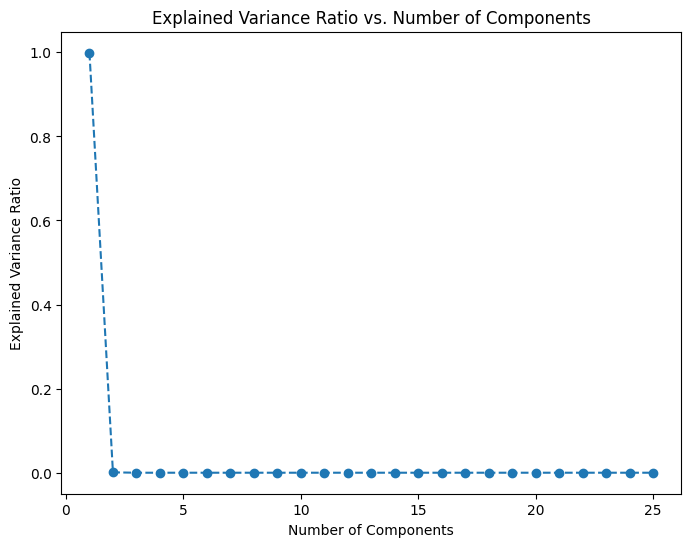

In [113]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(evr)+1),evr,marker='o',linestyle='--')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

it shows only one variable is enough

In [114]:
pca=PCA(n_components=1)
x_regression_pca=pca.fit_transform(x_regression)
x_regression

,Income,Frequency_of_Purchases,Average_Purchase_Amount,Customer_Lifespan_Months,Churn_Status,Recency,Frequency_Score,Monetary_Score,Age_sqrt,customers_value,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_New York,Region_Midwest,Region_Northeast,Region_West,Purchase_Channel_In-store,Purchase_Channel_Online
0,72504.0,10,98.241,3,1,3,2,2,7.000000,982.410,...,True,True,False,False,False,False,True,False,False,True
1,40881.0,15,157.640,4,1,3,3,3,6.164414,2364.600,...,False,False,False,False,True,False,False,True,True,False
2,63333.0,1,41.252,1,0,4,4,4,4.123106,41.252,...,True,False,False,False,True,False,True,False,False,True
3,58030.0,6,67.329,1,0,2,2,2,5.830952,403.974,...,True,True,False,False,False,True,False,False,True,False
4,78889.0,3,52.763,1,0,1,1,1,5.477226,158.289,...,True,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,18600.0,12,123.003,4,1,4,2,3,5.656854,1476.036,...,True,True,False,False,False,False,True,False,False,True
95,68525.0,13,106.526,4,1,4,3,3,6.164414,1384.838,...,True,True,False,False,False,False,False,True,False,True
96,73538.0,3,162.533,1,1,2,1,1,4.898979,487.599,...,False,False,True,False,False,False,False,True,True,False
97,47251.0,5,145.404,2,0,4,3,1,4.472136,727.020,...,False,True,False,False,False,True,False,False,True,False


we are skipping it as we have only 25 features and it is for more than 100 features